# Exercise : Mobile ads Click-Through Rate

ref: Susan Li

## Description of data

- id: ad identifier
- click: 0/ 1 for non-click / click
- hour: format is YYMMDDHH(UTC)
- C1 anonymized 
- banner_pos
- site_id
- site_category
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- c14 - c21 - anonymized categorical variables

only 1,000,000 out of the 40,000,000 records will be used for this exercise. THis will be sampled out of the lot

In [12]:
# import libraries
import numpy as np
import random
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


In [6]:
# # some global variables and specifications

n = 40428967 # total number of records in dataset
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))

In [18]:
types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [19]:
# import dataset and parse dates into required format and get only sample

parse_date = lambda val: pd.datetime.strptime(val, '%y%m%d%H' )

with gzip.open('./DATA/train.gz') as f:
    train = pd.read_csv(f, parse_dates=['hour'], date_parser= parse_date,
                       dtype=types_train, skiprows = skip_values)

## EDA

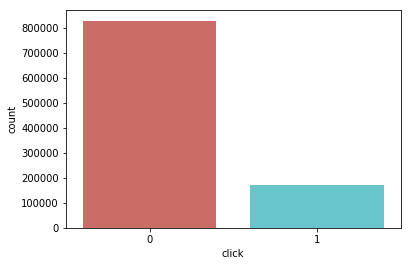

In [20]:
# check count of clicks

train['click'].value_counts() / len(train)
sns.countplot(x='click', data=train, palette='hls')
plt.show()

In [25]:
train.hour.describe()

count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11172
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

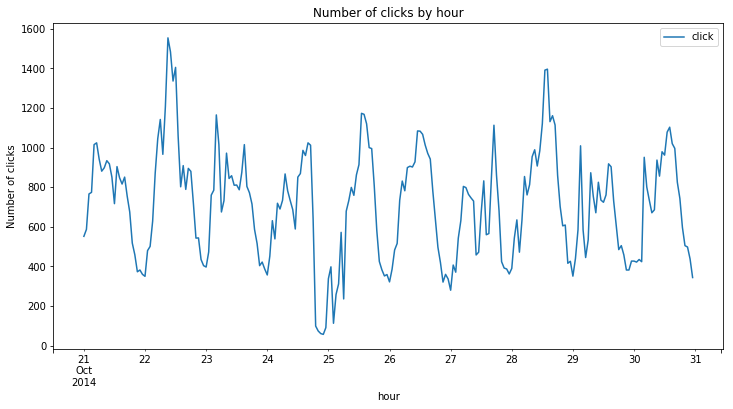

In [24]:
# some description on the dates

train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

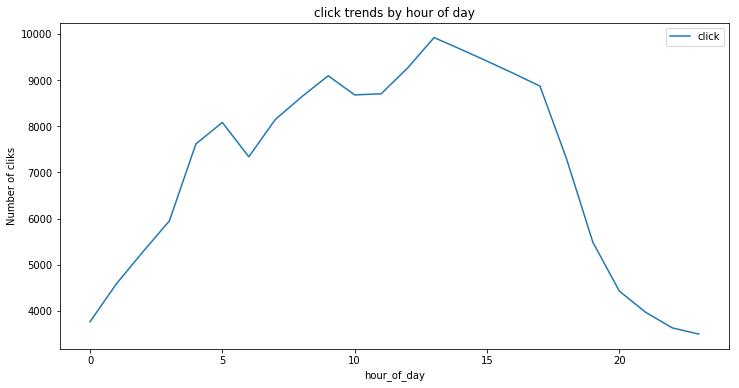

In [27]:
# extract hour from date time feature

train['hour_of_day'] = train.hour.apply(lambda x : x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of cliks')
plt.title('click trends by hour of day');
    

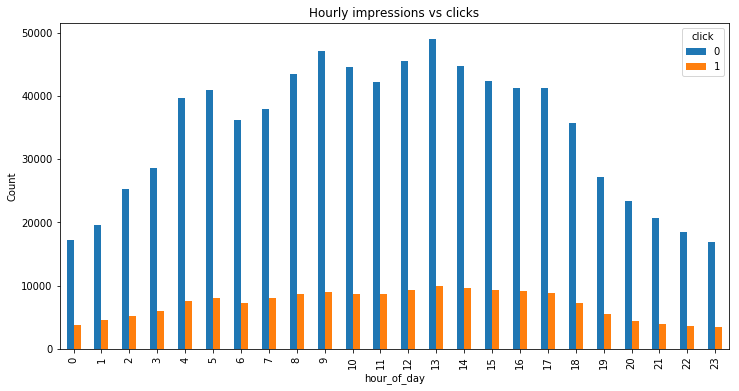

In [30]:
# a look at impressions

train.groupby(['hour_of_day', 
              'click']).size().unstack().plot(kind='bar', 
                                            title = 'Hour of Day', 
                                             figsize = (12,6))
plt.ylabel('Count')
plt.title('Hourly impressions vs clicks');

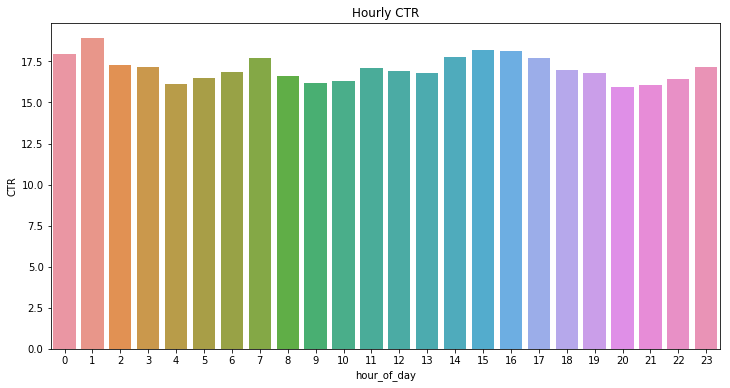

In [47]:
# calculating click-through rate ( ratio of clicks to impressions)

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click':'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions'] *100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


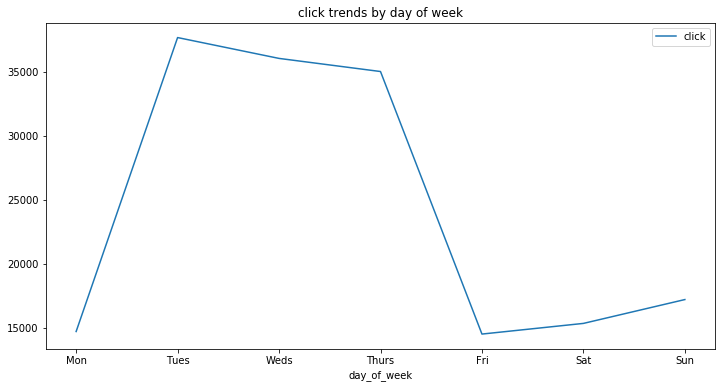

In [50]:
# Day of week
train['day_of_week'] = train['hour'].apply(lambda val:val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
        'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0,7,1)) # points on the x axis where label should appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

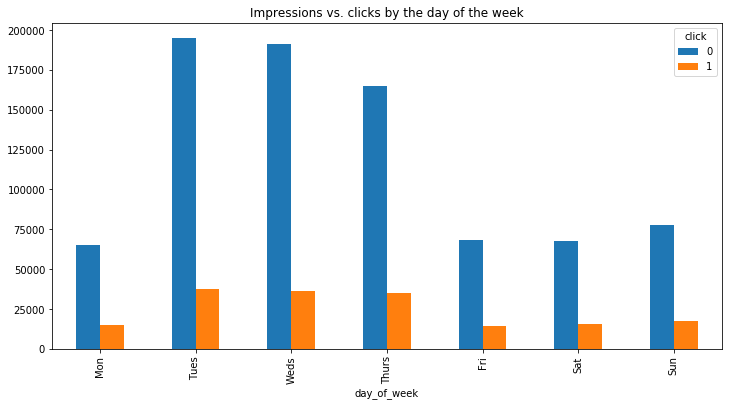

In [52]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar',
                                                                          title='Day of the week',
                                                                          figsize=(12,6))
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by the day of the week');

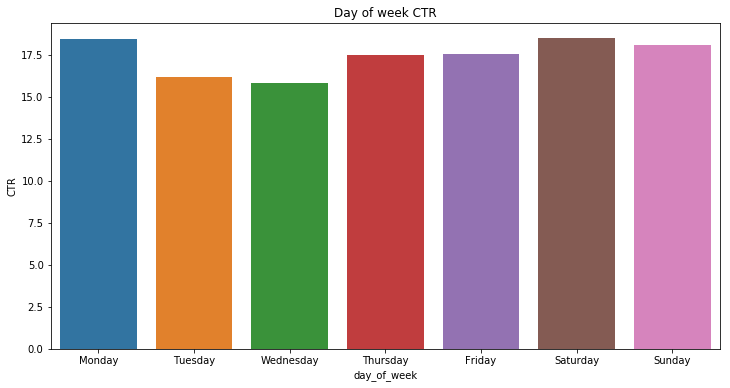

In [53]:
# Day of week CTR
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week', 'click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click':'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions'] *100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, 
           order=cats)
plt.title('Day of week CTR');

In [61]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list = [train.loc[np.where((train.banner_pos == i))].click.mean() for i in banner_pos]
for banner, avg in enumerate(ctr_avg_list):
    print(f"for banner position: {banner}, click through rate: {avg}")

for banner position: 0, click through rate: 0.16505024222068254
for banner position: 1, click through rate: 0.18400138092737905
for banner position: 2, click through rate: 0.10891089108910891
for banner position: 3, click through rate: 0.22807017543859648
for banner position: 4, click through rate: 0.14594594594594595
for banner position: 5, click through rate: 0.10743801652892562
for banner position: 6, click through rate: 0.32411820781696854


In [62]:
# Device type
print('The impressions by device types')
print((train.device_type.value_counts() / len(train)))

The impressions by device types
1    0.923091
0    0.054687
4    0.019042
5    0.003180
Name: device_type, dtype: float64


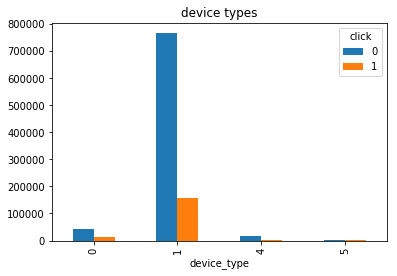

In [63]:
train[['device_type', 'click']].groupby(['device_type', 'click']).size().unstack().plot(kind='bar',
                                                                                       title='device types');

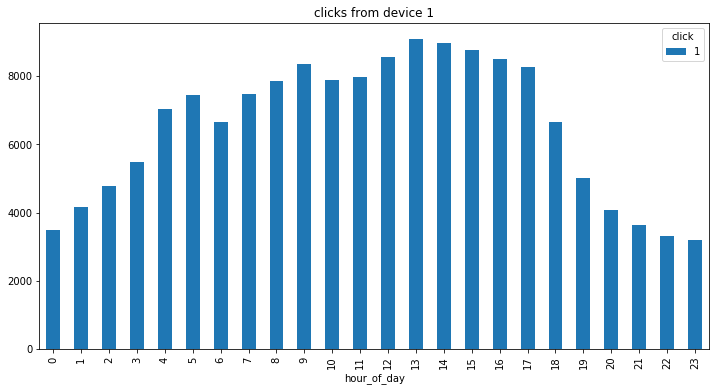

In [64]:
df_click[df_click['device_type'] == 1].groupby(['hour_of_day',
                                               'click']).size().unstack().plot(kind='bar',
                                                                              title='clicks from device 1',
                                                                              figsize=(12,6));

In [65]:
# perform hashing of ids

def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0, len(object_list_columns)):
        if object_list_dtypes[index] == object:
            self[object_list_columns[index] + new_col_suffix] \
            = self[object_list_columns[index]].map(lambda x:hash(x))
        
    self.drop([object_list_columns[index]], inplace=True, axis=1)
    return self

train = convert_obj_to_int(train)
    

# Models

In [74]:
# lightgbm Model

import lightgbm as lgb;

OSError: dlopen(/usr/local/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /usr/local/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [72]:
X_train = train.loc[:, train.columns != 'click']
y_target = train.click.values

# create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

# specify your configurations as a dict
params ={
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective':'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 31,
    'learning_rate':0.08,
    'feature_fraction':0.7,
    'bagging_fraction':0.3,
    'bagging_freq':5,
    'verbose':0
}

print('Start training...')
#train
gbm = lgb.train(params, 
               lgb_train,
               num_boost_round = 4000,
               valid_sets = lgb_eval,
               early_stopping_rounds = 500)


In [71]:
len(X_train)

1000000

## Xgboost Model

In [68]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libgomp.so for UNIX-like OSes)
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/usr/local/lib/python3.6/site-packages/xgboost/./lib/libxgboost.dylib, 6): Symbol not found: ___emutls_get_address\n  Referenced from: /usr/local/opt/gcc/lib/gcc/8/libgomp.1.dylib\n  Expected in: /usr/lib/libSystem.B.dylib\n in /usr/local/opt/gcc/lib/gcc/8/libgomp.1.dylib']


In [ ]:
def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_by_tree = 0.8
    print(f'XGBoost params. ETA: {eta},MAX_DEPTH: {max_depth}, SUBSAMPLE: {subsample}, COLSAMPLE_BY_TREE: {colsample_bytree}')
    params = {
        "objective" : "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta" : eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent" : 1,
        "seed" : random_state
    }
    
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2
    
    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain , num_boost_round, evals=watchlist, 
                    early_stopping_rounds=early_stopping_rounds, 
                   verbose_eval=True)
    

In [ ]:
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']


In [ ]:
run_default_test(train, y_target, features, 'click')